Question 4


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("D:\H\TranCongHau_N22DCCI010\Data\matches_use_3.xlsx")

streaks = {}

write = pd.DataFrame(columns=['Season','Club','Max Streaks'])

<>:4: SyntaxWarning: invalid escape sequence '\H'
<>:4: SyntaxWarning: invalid escape sequence '\H'
C:\Users\tranc\AppData\Local\Temp\ipykernel_11284\2549171557.py:4: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_excel("D:\H\TranCongHau_N22DCCI010\Data\matches_use_3.xlsx")


In [2]:
for season in data['Season_End_Year'].unique():
    season_data = data[data['Season_End_Year'] == season]
    streaks = {team:{'max':0, 'current':0} for team in pd.concat([season_data['Home'], season_data['Away']]).unique()}

    for ind, row in season_data.iterrows():
        home_team = row['Home']
        away_team = row['Away']
        result = row['FTR']

        if result == 'H':
            streaks[home_team]['current'] += 1
            streaks[home_team]['max'] = max(streaks[home_team]['max'], streaks[home_team]['current'])
            streaks[away_team]['current'] = 0
        elif result == 'A':
            streaks[away_team]['current'] += 1
            streaks[away_team]['max'] = max(streaks[away_team]['max'], streaks[away_team]['current'])
            streaks[home_team]['current'] = 0
        else:
            streaks[home_team]['current'] = 0
            streaks[away_team]['current'] = 0

    max_streaks_team = max(streaks, key=lambda team:streaks[team]['max'])
    max_streaks = streaks[max_streaks_team]['max']

    new_row = pd.DataFrame({'Season': [season], 'Club': [max_streaks_team], 'Max Streaks': [max_streaks]})
    write = pd.concat([write, new_row], ignore_index=True)

streaks = pd.DataFrame(streaks)
streaks

,Crystal Palace,Fulham,Tottenham,Newcastle Utd,Leeds United,Bournemouth,Everton,Leicester City,Manchester Utd,West Ham,Aston Villa,Manchester City,Southampton,Wolves,Arsenal,Brighton,Brentford,Nott'ham Forest,Chelsea,Liverpool
max,3,4,2,6,2,2,2,2,5,2,5,12,1,2,7,2,3,2,4,7
current,0,0,1,0,0,0,1,1,4,0,1,0,0,0,1,0,3,0,0,0


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\tranc\AppData\Local\Temp\ipykernel_10268\1348235886.py:1: SyntaxWarning: invalid escape sequence '\H'
  data_map = pd.read_excel('D:\H\TranCongHau_N22DCCI010\Python\Question 4\streaks.xlsx')


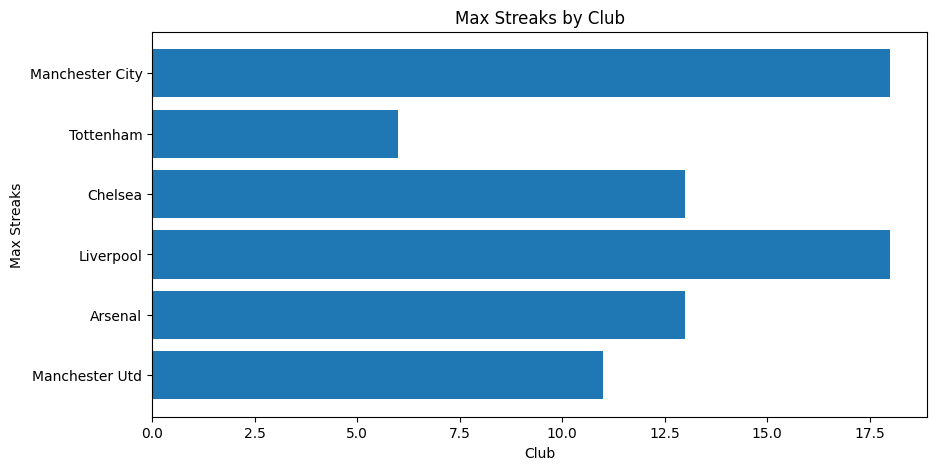

In [7]:
data_map = pd.read_excel('D:\H\TranCongHau_N22DCCI010\Python\Question 4\streaks.xlsx')

max_streaks = {}

for i, row in data_map.iterrows():
    team = row['Club']
    streaks = row['Max Streaks']

    if team not in max_streaks or streaks > max_streaks[team]:
        max_streaks[team] = streaks


plt.figure(figsize=(10, 5))
plt.barh(list(max_streaks.keys()), list(max_streaks.values()))
plt.xlabel('Club')
plt.ylabel('Max Streaks')
plt.title('Max Streaks by Club')
plt.xticks(rotation=0)
plt.show()